Penggunaan kartu kredit dan kartu debit meningkat signifikan setiap tahunnya beberapa tahun ini [1].
Menurut ECB (Bank Sentral Eropa), pada 2012, jumlah fraud mencapai 1.33 miliar euro, kenaikan 14.8% dari 2011 [1 dari 2].
Pelaku fraud terus-menerus mengubah strateginya untuk terhindar dari deteksi.
Metode machine learning bahkan bisa tidak cukup untuk mengadaptasi strategi fraud yang baru (tidak ter-update) [1].

#**1. DATA COLLECTION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/HandsOnIndonesiaAI/Project_2/fraudTrain.csv')
df.head(3)

Mounted at /content/drive


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


#**2. EXPLORATORY DATA ANALYSIS (EDA)**

##**2.1 General**

###**2.1.1 Shape**

In [ ]:
df.shape

(1296675, 23)

###**2.2 Describe**

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


###**2.1.3 Features**

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

###**2.1.4 Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

###**2.1.5 Data types to be processed**

In [ ]:
numerical = ['amt','zip','lat','long','city_pop','merch_lat','merch_long']
identifier = ['cc_num','unix_time']
categorical = ['merchant','category','gender','first','last','street','city','state','job','dob','trans_num']
numerical_categorical = numerical +categorical
target = ['is_fraud']

###**2.1.6 Number of rows per feature**

In [ ]:
feature = [var for var in df.columns]
for var in feature:
  print(f'{var}:', df[var].value_counts().shape[0])

Unnamed: 0: 1296675
trans_date_trans_time: 1274791
cc_num: 983
merchant: 693
category: 14
amt: 52928
first: 352
last: 481
gender: 2
street: 983
city: 894
state: 51
zip: 970
lat: 968
long: 969
city_pop: 879
job: 494
dob: 968
trans_num: 1296675
unix_time: 1274823
merch_lat: 1247805
merch_long: 1275745
is_fraud: 2


###**2.1.7 Cek Skewness dari tiap Feature**

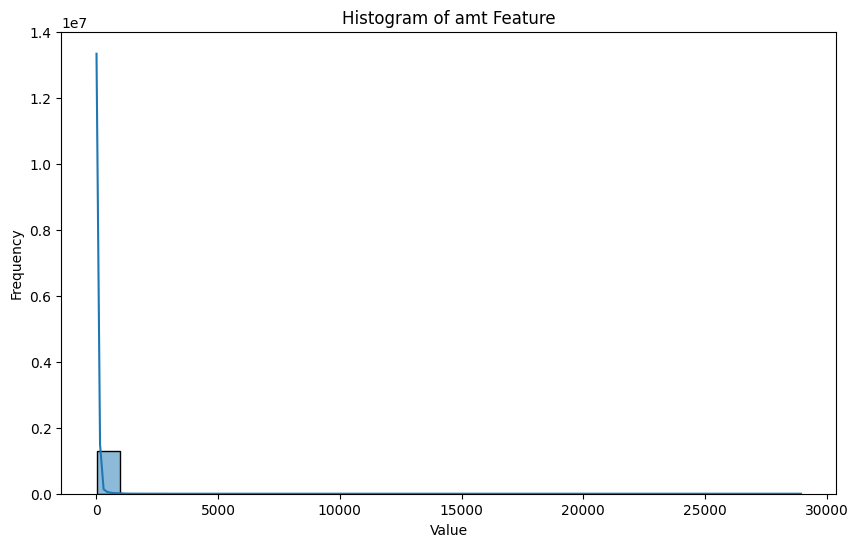

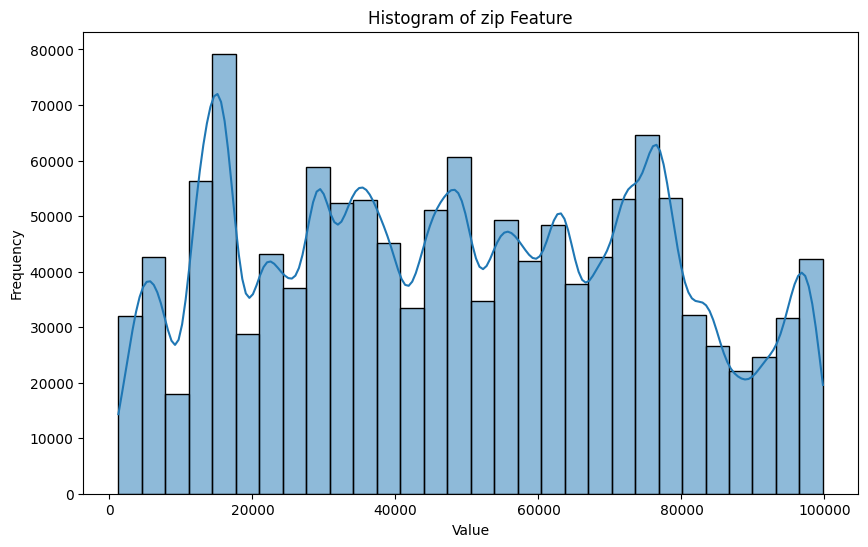

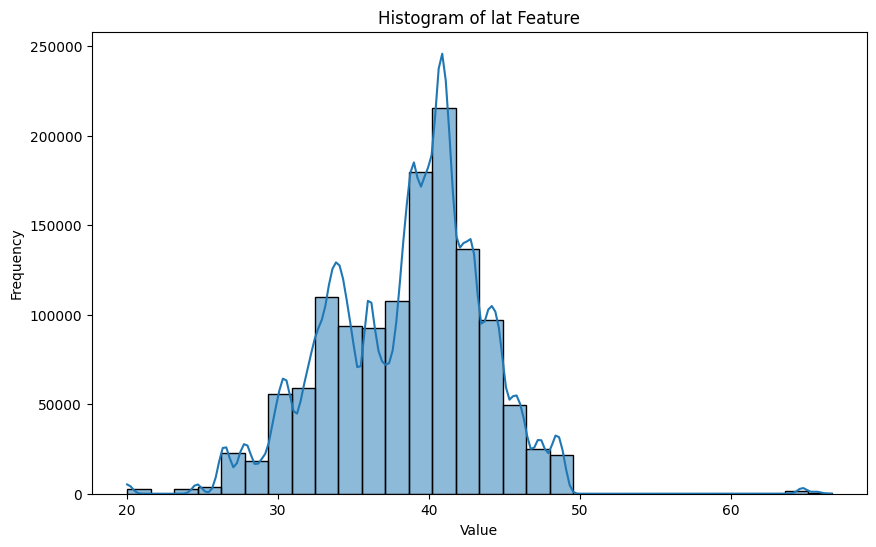

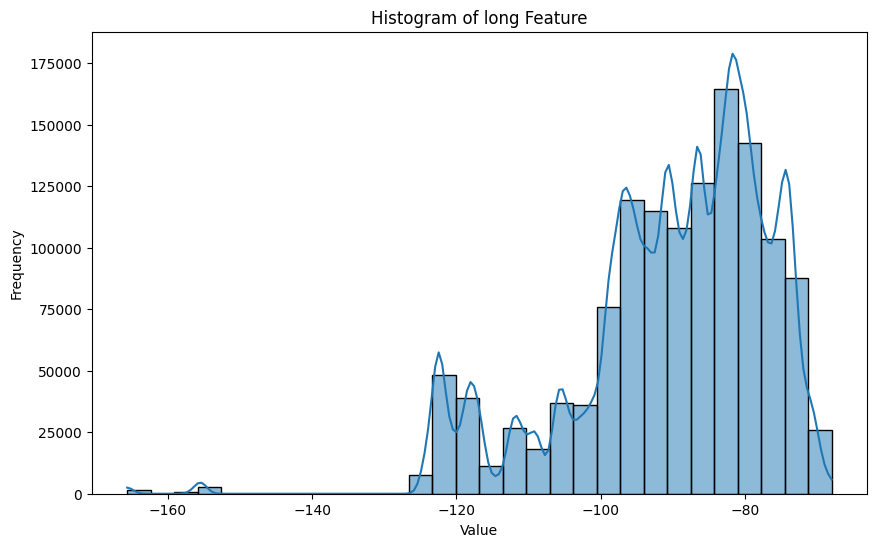

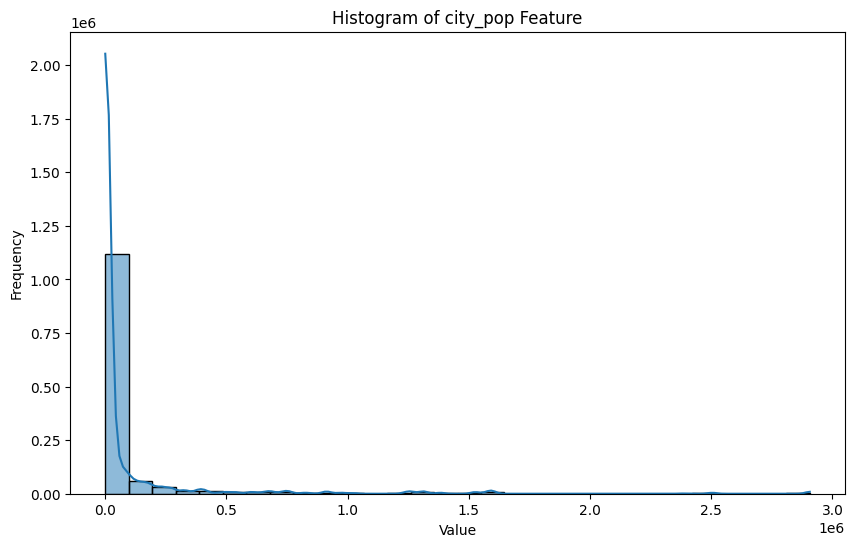

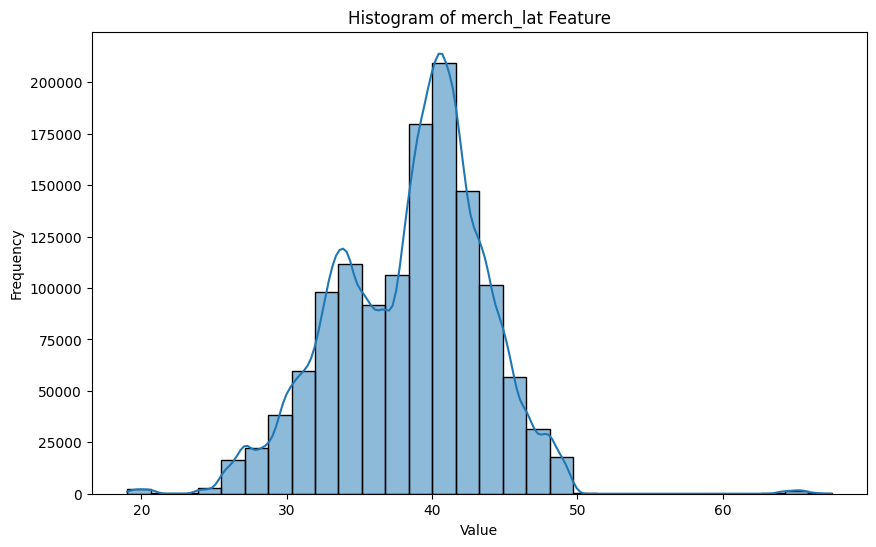

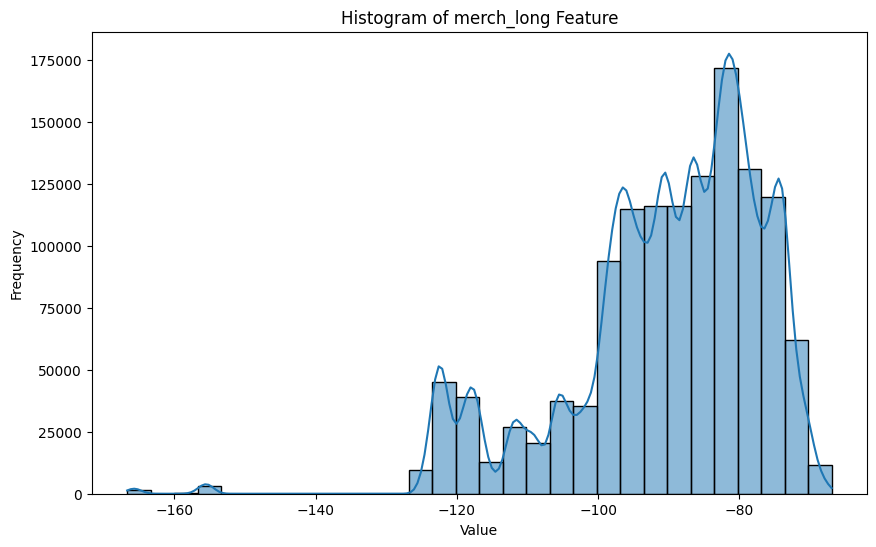

ValueError: `dataset` input should have multiple elements.

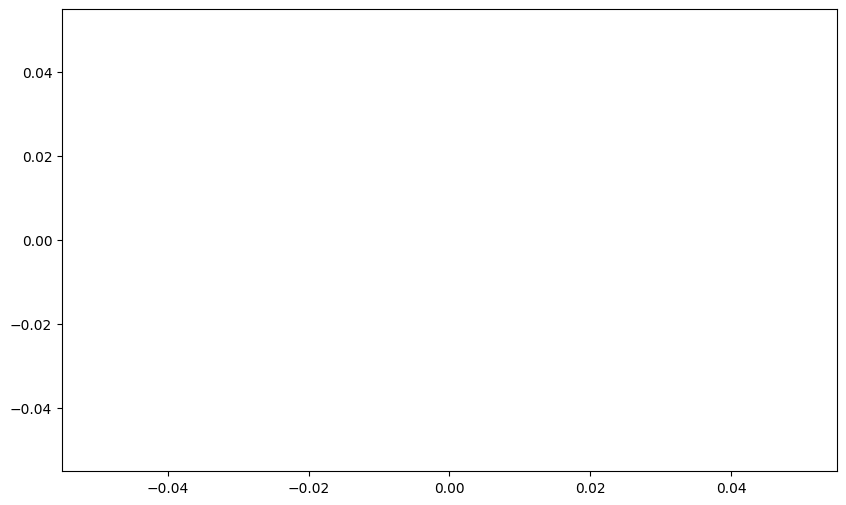

In [ ]:
for var in numerical:
  plt.figure(figsize=(10, 6))
  sns.histplot(dft[var], bins=30, kde=True)  # kde=True adds a density estimate curve
  plt.title(f'Histogram of {var} Feature')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

##**2.3 Cek Data Duplication**

In [ ]:
print("Jumlah data terduplikasi:", df.duplicated().sum())

Jumlah data terduplikasi: 0


##**2.4 Cek Missing Value**

In [ ]:
print(df.isna().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


##**2.5 Cek Outlier**

##**2.6 Explore feature**

In [ ]:
dft = df.copy()

###**2.6.1 is_fraud based on is_fraud**

In [ ]:
dft.is_fraud.nunique()

2

In [ ]:
pd.DataFrame(dft.is_fraud.value_counts())

,count
is_fraud,
0,1289169
1,7506


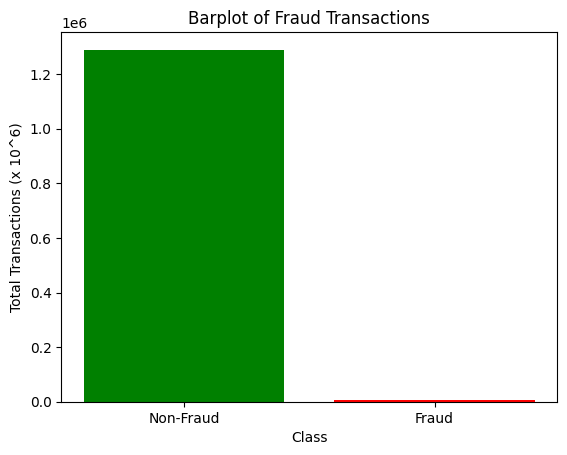

In [ ]:
plt.bar(["Non-Fraud", "Fraud"], dft.is_fraud.value_counts(), color=['green', 'red'])
plt.title("Barplot of Fraud Transactions")
plt.ylabel("Total Transactions (x 10^6)")
plt.xlabel("Class")
plt.show()

###**2.6.2 is_fraud based on gender**

In [ ]:
pd.DataFrame(dft.gender.value_counts())

,count
gender,
F,709863
M,586812


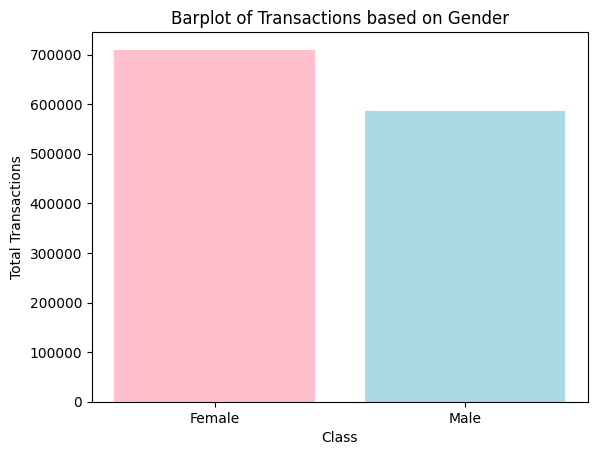

In [ ]:
plt.bar(["Female", "Male"], dft.gender.value_counts(), color=['pink', 'lightblue'])
plt.title("Barplot of Transactions based on Gender")
plt.ylabel("Total Transactions")
plt.xlabel("Class")
plt.show()

In [ ]:
fr = dft[dft['is_fraud']==1]
gender = []
gender.append((fr[fr['gender']=='M'].shape)[0])
gender.append((fr[fr['gender']=='F'].shape)[0])
pd.DataFrame(gender)

,0
0,3771
1,3735


###**2.6.3 is_fraud based on category**

In [ ]:
dft.category.nunique()

14

In [ ]:
dft.category.unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

[915, 1743, 233, 618, 250, 134, 1713, 843, 151, 220, 133, 116, 239, 198]


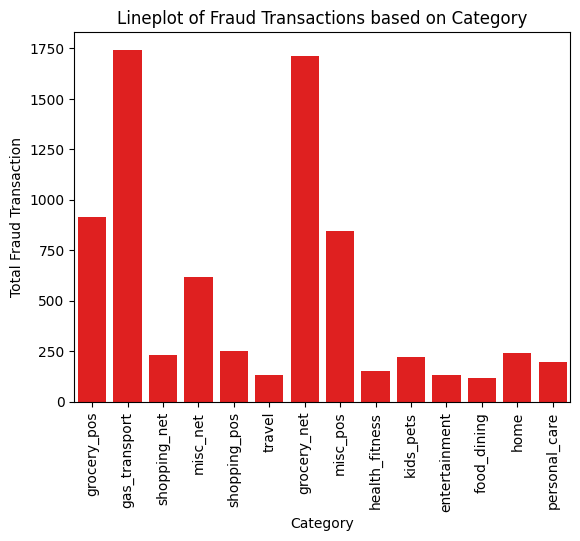

In [ ]:
fr = dft[dft['is_fraud']==1]
cat = []

for var in dft.category.unique():
  cat.append(fr[fr['category']==var].shape[0])
print(cat)

sns.barplot(x=pd.Series(fr.category.unique()), y=pd.Series(cat), color='red')
plt.title("Lineplot of Fraud Transactions based on Category")
plt.ylabel("Total Fraud Transaction")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.show()

###**2.6.4 is_fraud based on job**

In [ ]:
print("Variations of job:", dft['job'].nunique())

Variations of job: 494


###**2.6.5 is_fraud based on state**

In [ ]:
dft.state.nunique()

51

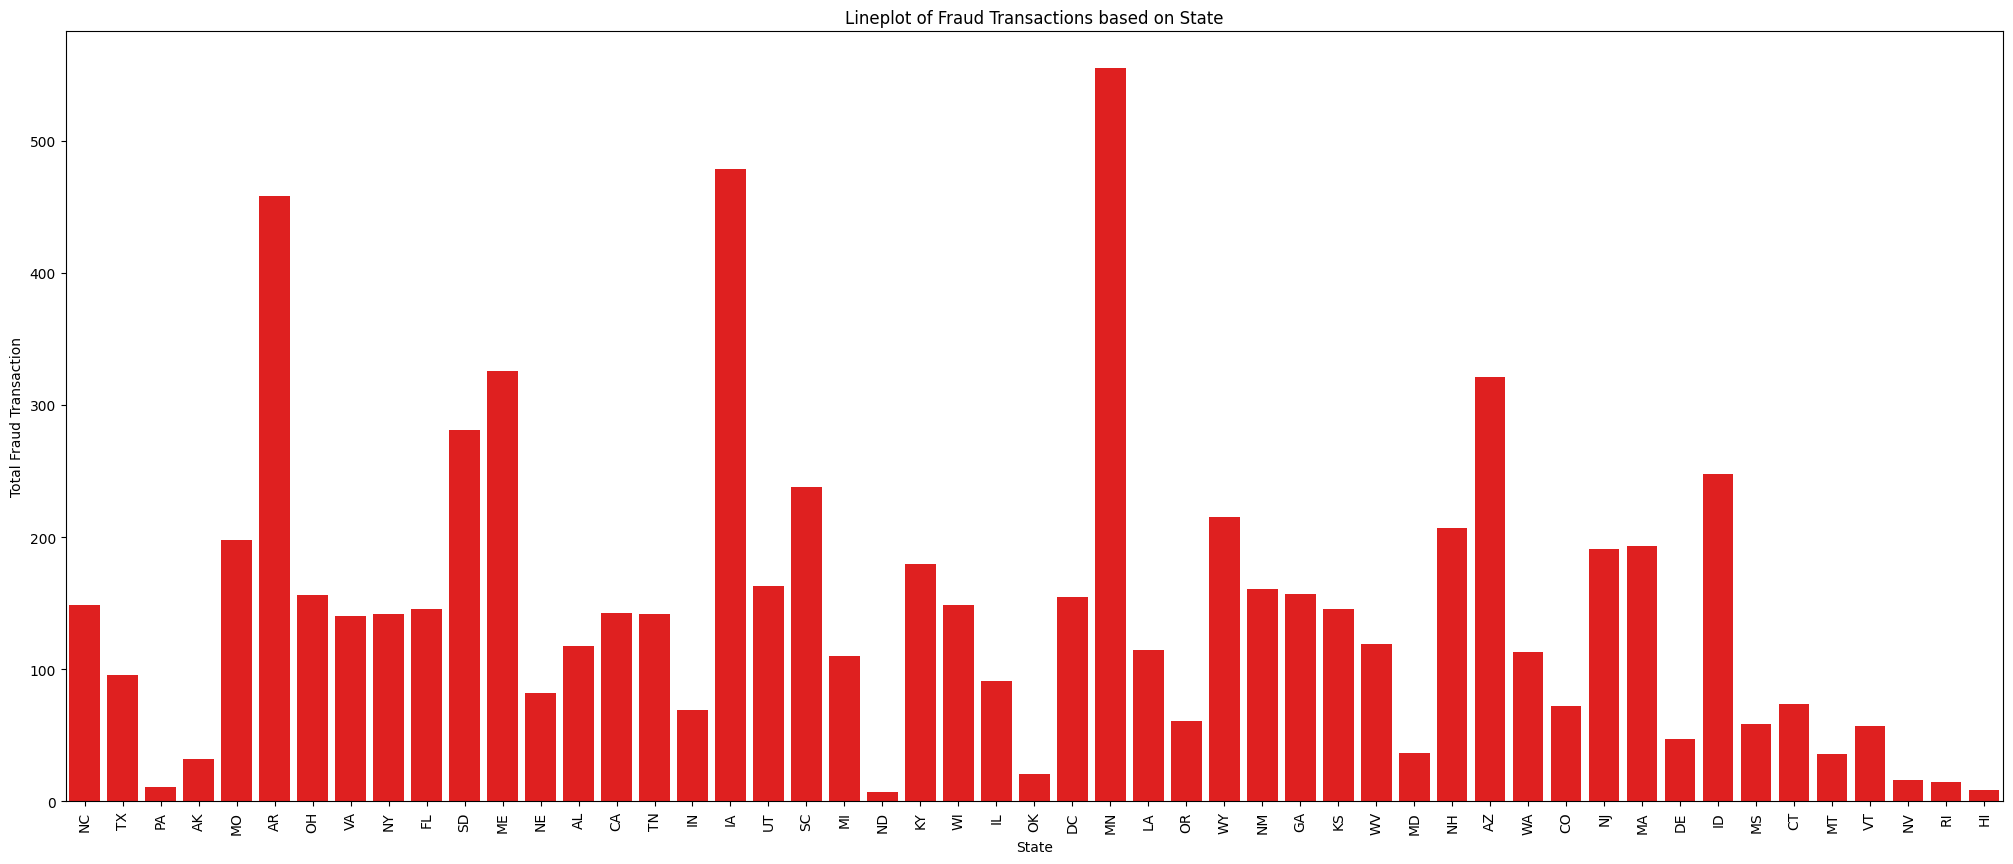

In [ ]:
state_0 = []

for var in dft.state.unique():
  state_0.append(fr[fr['state']==var].shape[0])

plt.figure(figsize=(25,10))
sns.barplot(x=pd.Series(fr.state.unique()), y=pd.Series(state_0), color='red')
plt.title("Lineplot of Fraud Transactions based on State")
plt.ylabel("Total Fraud Transaction")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()

###**2.6.6 is_fraud based on city**

In [ ]:
pd.DataFrame(dft.city.value_counts())

,count
city,
Birmingham,5617
San Antonio,5130
Utica,5105
Phoenix,5075
Meridian,5060
...,...
Vacaville,7
Claypool,7
Karns City,7


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20)
dft_city = pd.DataFrame()

city_counts = dft['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']
X = city_counts[['count']]
dft_city['city_cluster'] = kmeans.fit_predict(X)

dft_city.head()

,city_cluster
0,11
1,8
2,8
3,8
4,8


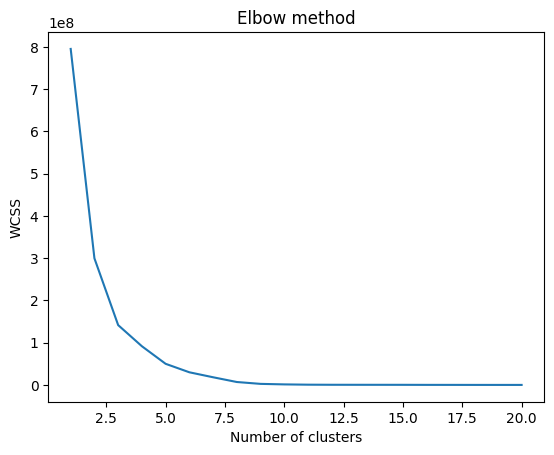

In [ ]:
#Elbow Method
wcss=[]
for i in range(1,21):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

plt.plot(range(1,21),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

###**2.6.7 is_fraud based on merchant**

In [ ]:
dft.merchant.nunique()

693

In [ ]:
dft.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


###**2.6.8 is_fraud based on street**

In [ ]:
dft.street.nunique()

983

###**2.6.9 is_fraud based on first**

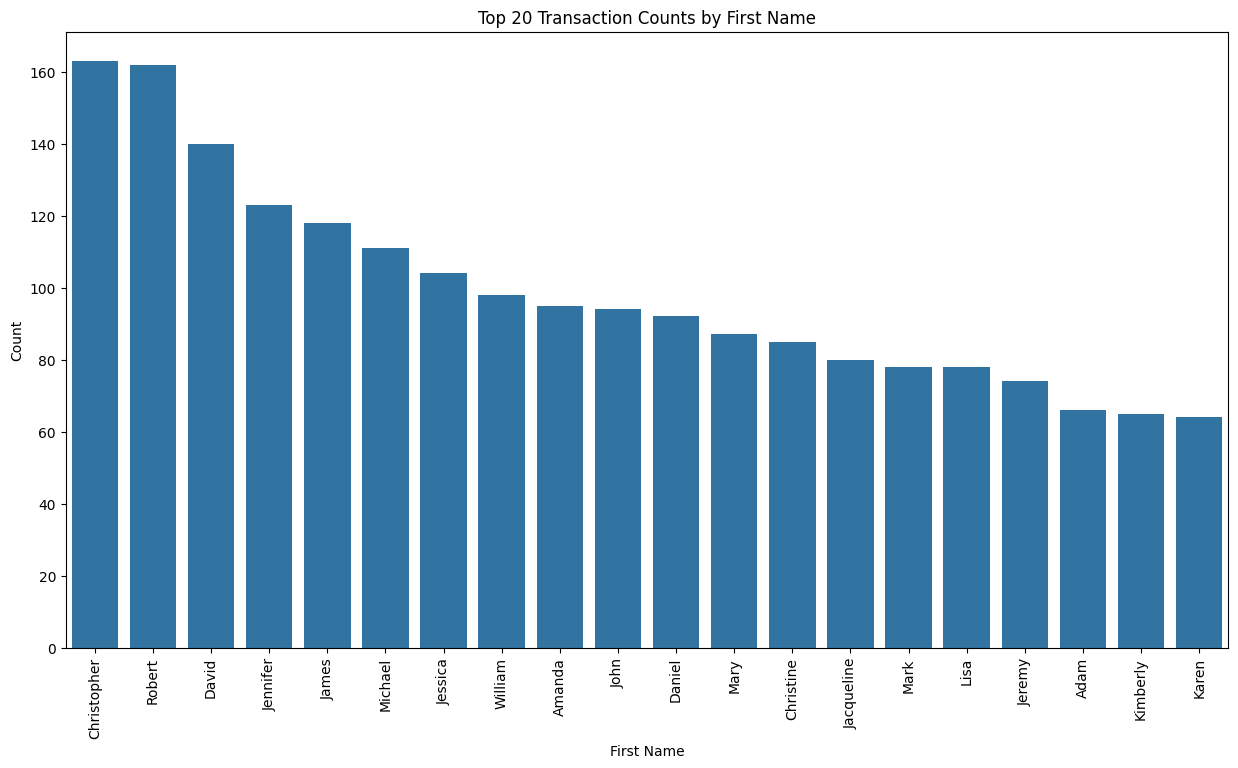

In [ ]:
top_first_names = fr['first'].value_counts().nlargest(20).index

filtered_fr = fr[fr['first'].isin(top_first_names)]

plt.figure(figsize=(15, 8))
sns.countplot(x='first', data=filtered_fr, order=top_first_names)
plt.title('Top 20 Transaction Counts by First Name')
plt.xlabel('First Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


###**2.6.10 is_fraud based on last**

##**2.7 Scatterplot Merchant Latitude and Longitude**

<Axes: xlabel='merch_long', ylabel='merch_lat'>

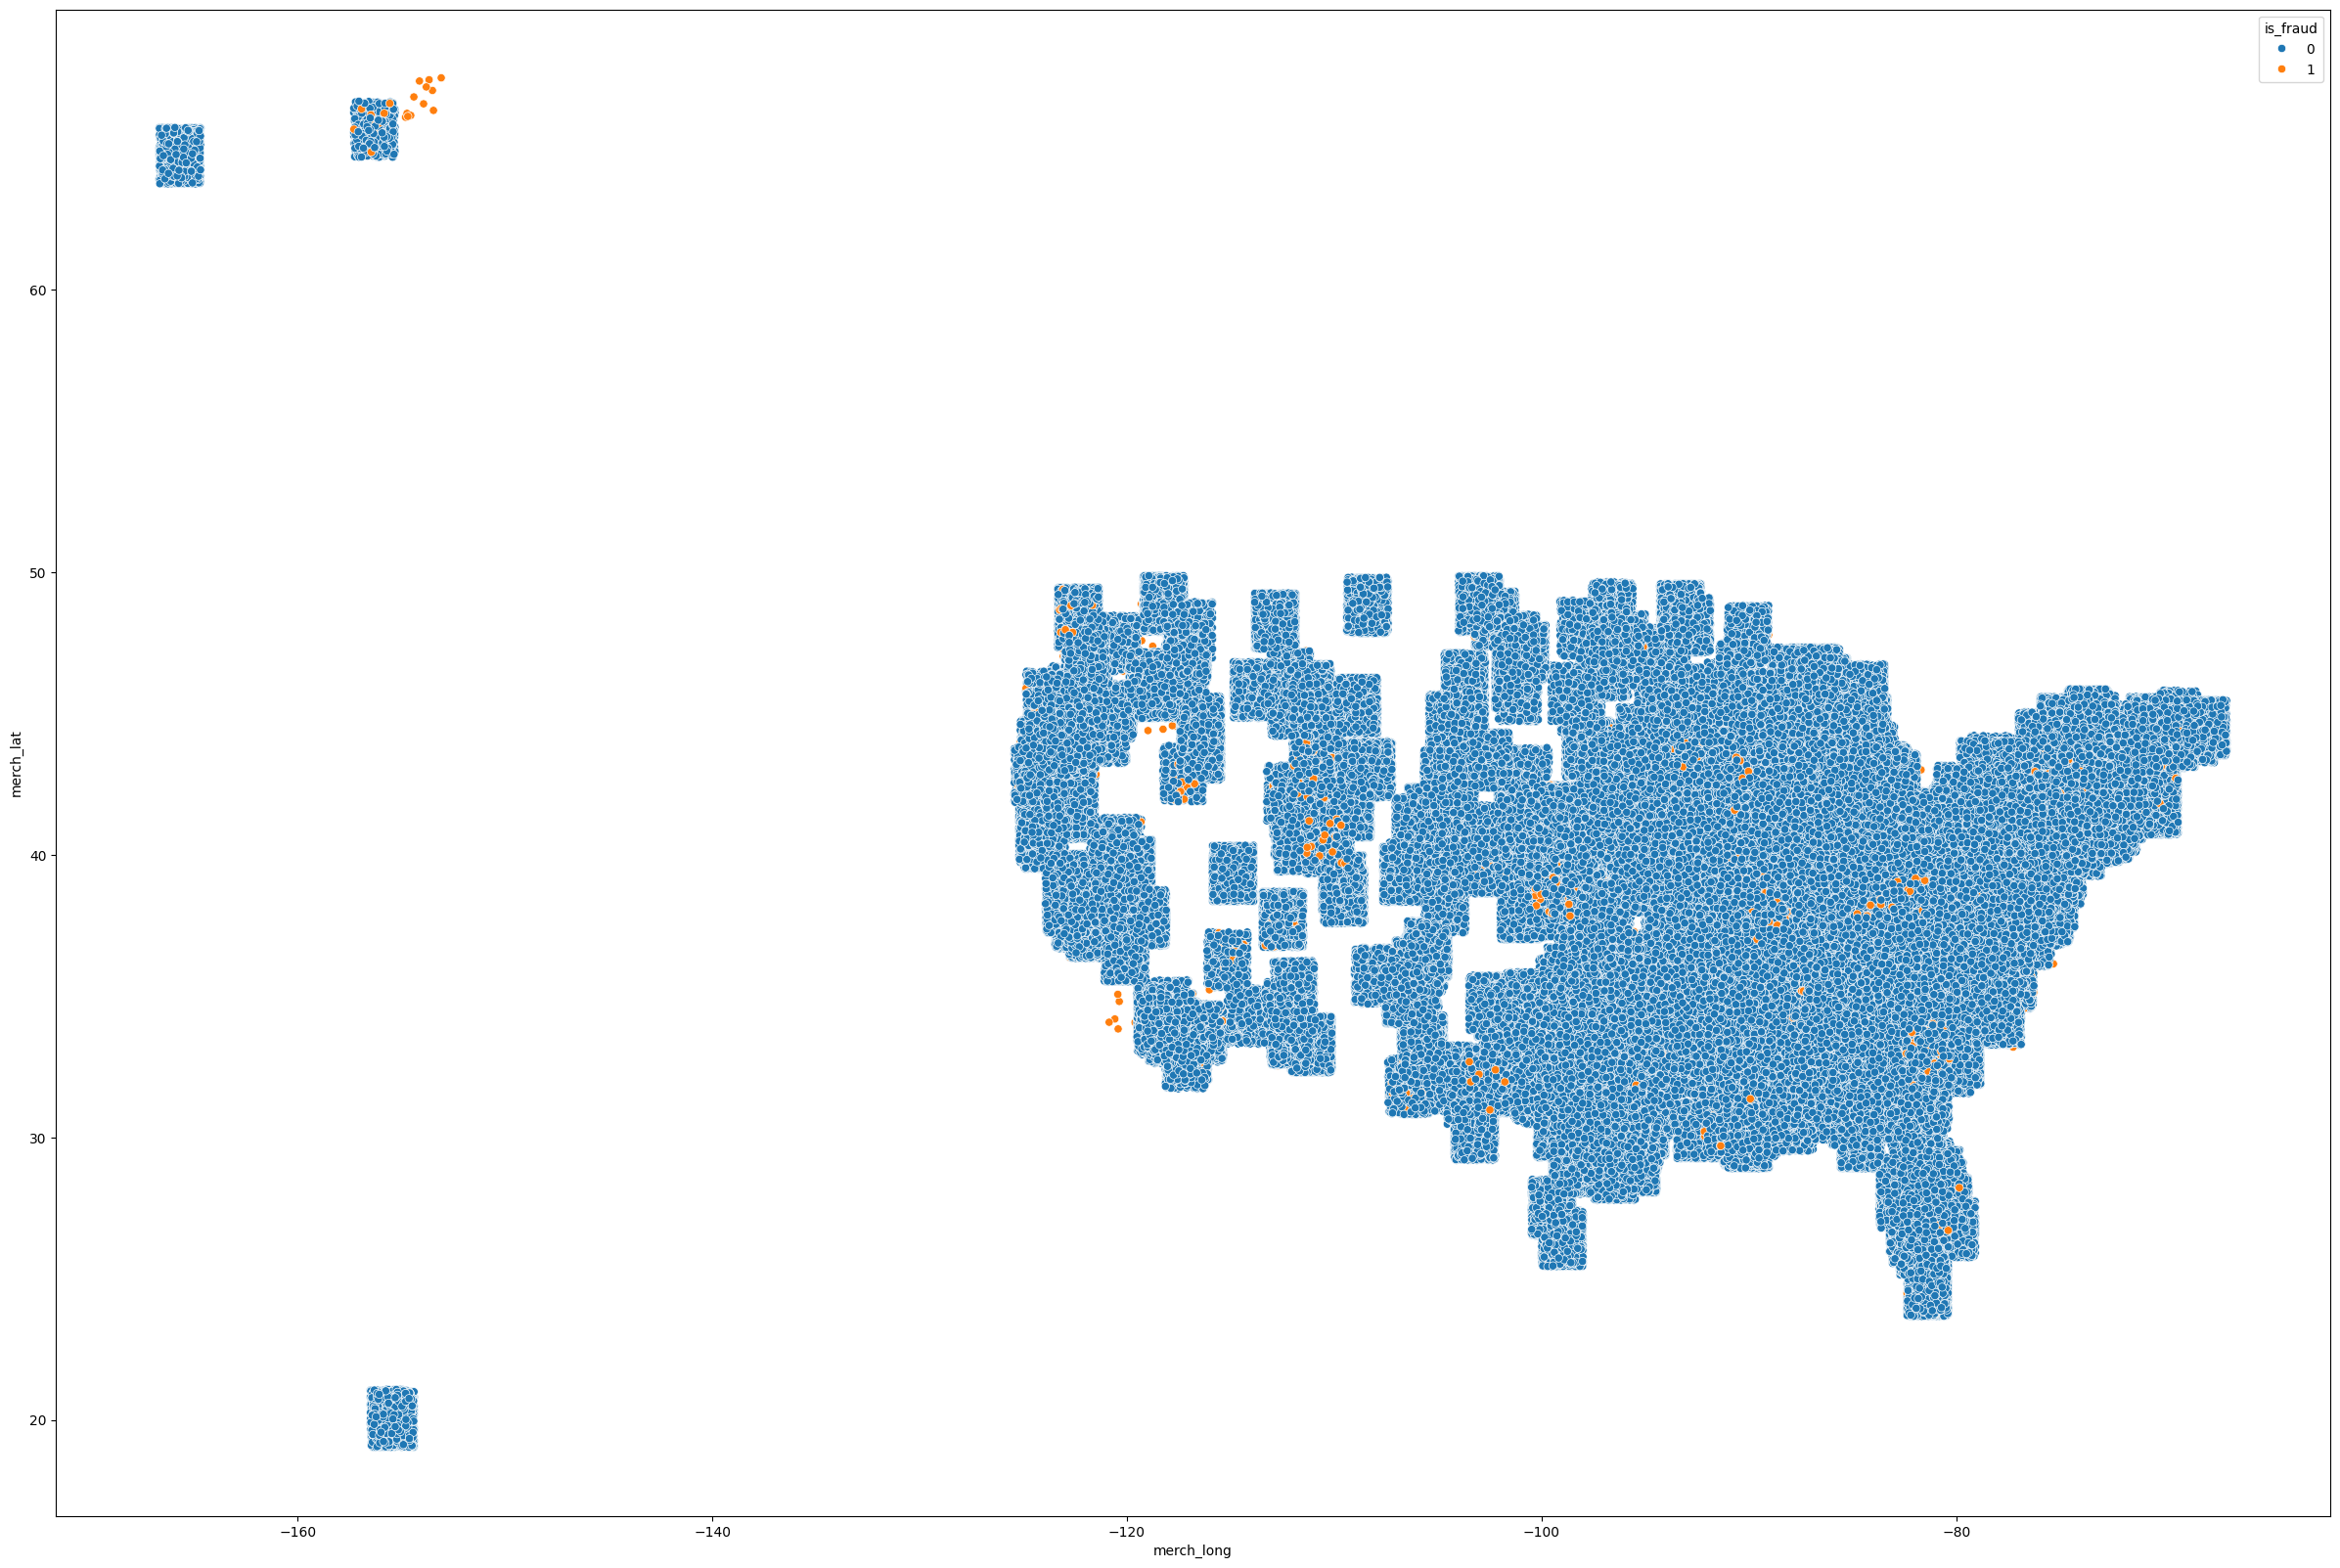

In [ ]:
plt.figure(figsize=(30,20))
sns.scatterplot(x=dft['merch_long'],y=dft['merch_lat'],data=dft,hue=dft['is_fraud'])

#**3. DATA PREPROCESSING**

In [ ]:
dft2 = dft.copy()

##**3.1 Feature manipulation (part 1)**

###**3.1.1 Drop feature "Unnamed: 0", "first", dan "last"**.

In [ ]:
dft2.drop("Unnamed: 0", axis=1, inplace=True)
dft2.drop("first", axis=1, inplace=True)
dft2.drop("last", axis=1, inplace=True)
#dft2.drop("trans_num", axis=1, inplace=True)
dft2.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


###**3.1.2 Mengubah feature date dan dob ke datetime**

In [ ]:
import datetime
dft2['trans_date_trans_time'] = pd.to_datetime(dft2['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
dft2['dob'] = pd.to_datetime(dft2['dob'])
dft2.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


##**3.2 Binning feature**

###**3.2.1 Job**

####**3.2.1.1 Mencari variasi apa saja yang banyak pada job**

####**3.2.1.2 Menyederhanakan (binning) jumlah feature job menjadi lebih 'umum'**

In [ ]:
#(1) Mengganti variasi pekerjaan yang berkaitan dengan guru menjadi 'teacher'
dft2['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",
        "Special educational needs teacher","Teacher, special educational needs",
        "Further education lecturer","English as a second language teacher","Associate Professor",
        "Lecturer, further education","Private music teacher","Lecturer, higher education",
        "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
        "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
        "English as a foreign language teacher","Teacher, adult education"],'Teacher', inplace=True)

<ipython-input-52-c63948b96ac1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dft2['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",


In [ ]:
#(2) Mengganti variasi pekerjaan yang berkaitan dengan keteknikan menjadi 'engineer'
dft2['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer', 'Naval architect', 'Contractor', 'Architect', 'Landscape architect'],
        'Engineer', inplace=True)

In [ ]:
#(3) Mengganti variasi pekerjaan yang berkaitan dengan sains menjadi 'scientist'
dft2['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)", 'Cytogeneticist',
            'Geneticist, molecular', 'Geochemist', 'Immunologist', 'Cartographer', "Clinical research associate",
            'Clinical biochemist', 'Operations geologist', 'Embryologist, clinical', 'Health physicist',
            'Biochemist, clinical', 'Oncologist', 'Clinical cytogeneticist', 'Analytical chemist',
            'Horticulturist, commercial','Seismic interpreter', 'Geologist, wellsite', 'Ecologist',
            'Hydrogeologist', 'Geophysicist/field seismologist', 'Herpetologist', 'Herbalist', 'Osteopath',
            'Animal nutritionist', 'Wellsite geologist', 'Chemist, analytical', 'Metallurgist',
            'Field seismologist', 'Oceanographer', 'Dispensing optician', 'Plant breeder/geneticist',
            'Occupational hygienist', 'Optometrist', 'Podiatrist', 'Pharmacologist', 'Hydrologist',
            'Physicist, medical', 'Optician, dispensing', 'Archaeologist'],'Scientist', inplace=True)

In [ ]:
#(4) Mengganti variasi pekerjaan yang berkaitan dengan pegawai menjadi 'officer'
dft2['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer",
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',
            'Research officer, trade union ','Research officer, political party',
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
            "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
            "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum', 'Research officer, trade union'],
            'Officer', inplace=True)

In [ ]:
#(5) Mengganti variasi pekerjaan yang berkaitan dengan manajer menjadi 'manager'
dft2['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager", 'Comptroller',
                           "Warehouse manager"],'Manager', inplace=True)

In [ ]:
#(6) Mengganti variasi pekerjaan yang berkaitan dengan desainer menjadi 'designer'
dft2['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [ ]:
#(7) Mengganti variasi pekerjaan yang berkaitan dengan surveyor menjadi 'surveyor'
dft2['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [ ]:
#(8) Mengganti variasi pekerjaan yang berkaitan dengan bidang psikologi menjadi 'psychologist'
dft2['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist", 'Psychiatrist'],
                          'Psychologist', inplace=True)

In [ ]:
#(9) Mengganti variasi pekerjaan yang berkaitan dengan editor menjadi 'editor'
dft2['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [ ]:
#(10) Mengganti variasi pekerjaan yang berkaitan dengan producer menjadi 'producer'
dft2['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [ ]:
#(11) Mengganti variasi pekerjaan yang berkaitan dengan terapis menjadi 'Legal/Law'
dft2['job'].replace(['Patent attorney', 'Transport planner', 'Arboriculturist','Legal secretary',
                   'Lawyer', 'Licensed conveyancer', "Barrister's clerk", 'Barrister', 'Trade mark attorney'],
                   'Law Professionals', inplace=True)

In [ ]:
#(12) Mengganti variasi pekerjaan yang berkaitan dengan perawat menjadi 'Health Practitioner'
dft2['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health",
                    'Health Practitioner', "Surgeon","Hospital doctor","Doctor, general practice",
                    "Doctor, hospital", "Tree surgeon","Neurosurgeon","Veterinary surgeon",
                    "General practice doctor","Psychotherapist, child","Therapist, occupational",
                    "Physiotherapist", "Child psychotherapist","Phytotherapist","Therapist, horticultural",
                    "Therapist, art", "Therapist, sports","Music therapist","Horticultural therapist",
                    "Art therapist", "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                    "Therapist, drama","Therapist, music","Occupational therapist", 'Pathologist', 'Paramedic',
                   'Medical physicist', 'Toxicologist',  'Orthoptist','Radiographer, diagnostic', 'Chiropodist',
                   'Radiographer, therapeutic', 'Ambulance person','Environmental health practitioner',
                   'Exercise physiologist',  'Hospital pharmacist', 'Pharmacist, hospital',
                   'Pharmacist, community', 'Acupuncturist', 'Diagnostic radiographer'], 'Health Practitioner', inplace=True)

In [ ]:
#(13) Mengganti variasi pekerjaan yang memiliki kata executive menjadi 'executive'
dft2['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [ ]:
#(14) Mengganti variasi pekerjaan yang berkaitan dengan penelitian menjadi 'researcher'
dft2['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [ ]:
#(15) Mengganti variasi pekerjaan yang berkaitan dengan konsultan menjadi 'consultant'
dft2['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant", 'Financial adviser', 'Health and safety adviser',
                    'Higher education careers adviser', 'Careers adviser', 'Tax adviser',
                    'Health promotion specialist', 'Advice worker', 'Learning mentor', 'Counsellor'],
                    'Consultant', inplace=True)

In [ ]:
#(16) Mengganti variasi pekerjaan yang berkaitan dengan akuntan menjadi 'economy professionals'
dft2['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered", 'Futures trader', 'Economist', 'Accounting technician',
                   'Intelligence analyst', 'Corporate investment banker', 'Senior tax professional/tax inspector',
                   'Financial trader','Retail banker','Investment banker, operational', 'Investment banker, corporate',
                   'Statistician', 'Insurance broker', 'Equities trader', 'Tax inspector', 'Insurance underwriter', 'Risk analyst', 'Chartered Accountant',
                   'Investment analyst'], 'Economy Professionals', inplace=True)

In [ ]:
#(17) Mengganti variasi pekerjaan yang berkaitan dengan administrasi menjadi 'administrator'
dft2['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts", 'Administrator'],
                          'Administrator', inplace=True)

In [ ]:
#(18) Mengganti variasi pekerjaan yang berkaitan dengan kedokteran menjadi 'IT professionals'
dft2['job'].replace(['IT trainer', 'Systems developer','Systems analyst', 'Applications developer',
                   'Programmer, multimedia', 'Sales professional, IT', 'Animator', 'Multimedia programmer',
                   'Programmer, applications'], 'IT Professionals' , inplace=True)

In [ ]:
#(19) Mengganti variasi pekerjaan yang berkaitan dengan technologist menjadi 'Operators and Technologist'
dft2['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist",
                'Technical brewer', 'Technologist'], 'Technologist', inplace=True)

In [ ]:
#(20) Mengganti variasi pekerjaan lainnya menjadi 'other'
dft2['job'].replace(['Science writer',
       'Interpreter', 'Health visitor', 'Event organiser', 'Librarian, public', 'Freight forwarder',
       'Solicitor, Scotland', 'Conservator, museum/gallery', 'Television production assistant',
       'Medical sales representative', 'Pilot, airline', 'Broadcast journalist', 'Dancer', 'Industrial buyer',
       'Air traffic controller', 'Ship broker', 'Homeopath', 'Solicitor', 'Community arts worker',
       'Production assistant, television', 'Production assistant, radio', 'Claims inspector/assessor',
       'Academic librarian', 'Artist','Conservator, furniture', 'Media planner', 'Charity fundraiser', 'Advertising copywriter',
       'Airline pilot', 'Furniture conservator/restorer', 'Firefighter',
       'Development worker, international aid', 'Presenter, broadcasting',
       'Company secretary','Magazine journalist', 'Media buyer', 'Visual merchandiser', 'Museum/gallery conservator',
       'Press photographer', 'Buyer, retail', 'Community development worker', 'Aid worker', 'Public librarian', 'Town planner',
       'Barista', 'Music tutor', "Politician's assistant", 'Insurance claims handler', 'Gaffer'
       'Teaching laboratory technician', 'Scientific laboratory technician', 'Musician', 'Warden/ranger', 'Chief of Staff',
       'Air cabin crew', 'Development worker, community', 'Special effects artist', 'Cabin crew', 'Press sub', 'Writer',
       'Illustrator', 'Buyer, industrial', 'Merchandiser, retail', 'Retail buyer', 'Civil Service fast streamer'
       'Amenity horticulturist', 'Retail merchandiser', 'Broadcast presenter','Medical secretary', 'Theatre director','Mudlogger','Air broker',
       'Copy', 'Bookseller', 'Land', 'Chartered loss adjuster', 'Sub', 'Fine artist', 'Lexicographer',
       'Radio broadcast assistant', 'Community pharmacist', 'Loss adjuster, chartered',
       'Curator', 'Television camera operator', 'Dealer', 'Journalist, newspaper',
       'Commercial horticulturist', 'Volunteer coordinator', 'Camera operator', 'Copywriter, advertising',
       'Advertising account planner', 'Archivist', 'Make', 'Librarian, academic', 'Gaffer', 'Amenity horticulturist',
        'Teaching laboratory technician', 'Civil Service fast streamer'], 'Other', inplace=True)

####**3.2.1.3 Visualisasi Transactions berdasarkan job**

In [ ]:
dft2['job'].value_counts()

,count
job,
Other,222646
Engineer,154803
Scientist,151742
Health Practitioner,119948
Officer,110915
Manager,68392
Economy Professionals,61656
Designer,54290
Consultant,50887


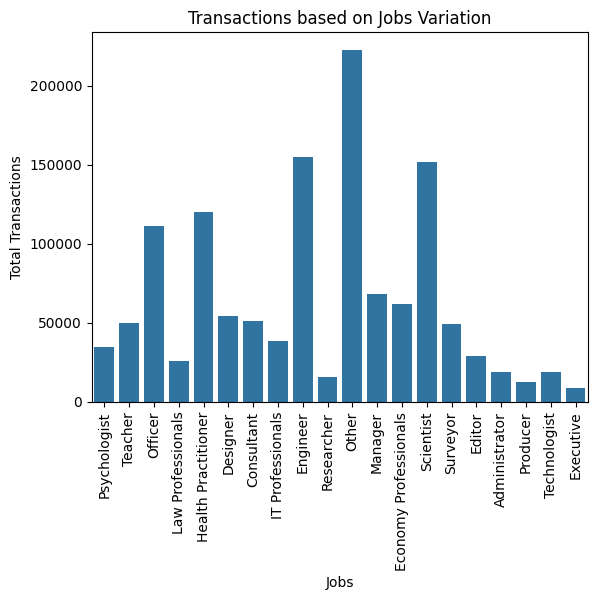

In [ ]:
job0 = []

for var in dft2.job.unique():
  job0.append(dft2[dft2['job']==var].shape[0])

sns.barplot(x=pd.Series(dft2.job.unique()), y=pd.Series(job0))
plt.title("Transactions based on Jobs Variation")
plt.ylabel("Total Transactions")
plt.xlabel("Jobs")
plt.xticks(rotation=90)
plt.show()

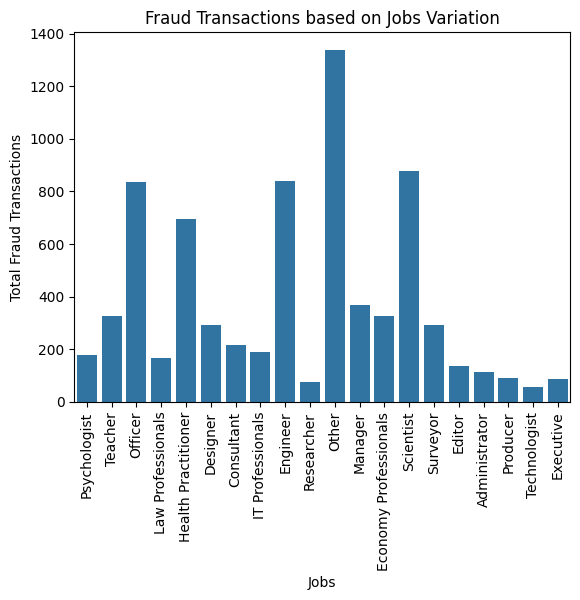

In [ ]:
fr = dft2[dft2['is_fraud']==1]

job = []
transaction =[]

for var in dft2.job.unique():
  job.append(var)
  transaction.append(fr[fr['job']==var].shape[0])

sns.barplot(x=pd.Series(dft2.job.unique()), y=pd.Series(transaction))
plt.title("Fraud Transactions based on Jobs Variation")
plt.ylabel("Total Fraud Transactions")
plt.xlabel("Jobs")
plt.xticks(rotation=90)
plt.show()

jobs = pd.DataFrame()
jobs['job'] = job
jobs['transaction'] = transaction

In [ ]:
jobs.head(2)

,job,transaction
0,Psychologist,179
1,Teacher,325


In [ ]:
#Job dengan fraud terendah
jobs.loc[jobs['transaction'].idxmin()]

,18
job,Technologist
transaction,58


In [ ]:
#Job dengan fraud tertinggi
jobs.loc[jobs['transaction'].idxmax()]

,10
job,Other
transaction,1338


###**3.2.2 State**

####**3.2.2.1 Menyederhanakan (binning) jumlah feature state menjadi lebih umum**

In [ ]:
#Membagi state menjadi 4 region berdasarkan data US Census Bureau
#link: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
dft2['state'].replace(['WA','OR','MT','WY','CO','AZ','NM','UT','NV','CA','ID','HI','AK'], 'West', inplace=True)
dft2['state'].replace(['CT','ME','MA','NH','NJ','NY','PA','RI','VT'], 'Northeast', inplace=True)
dft2['state'].replace(['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI'], 'Midwest', inplace=True)
dft2['state'].replace(['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','TX','VA','WV'], 'South', inplace=True)

<ipython-input-78-7c2657fbb77d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dft2['state'].replace(['WA','OR','MT','WY','CO','AZ','NM','UT','NV','CA','ID','HI','AK'], 'West', inplace=True)


In [ ]:
dft2.state.unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

####**3.2.2.2 Visualisasi Transactions berdasarkan state**

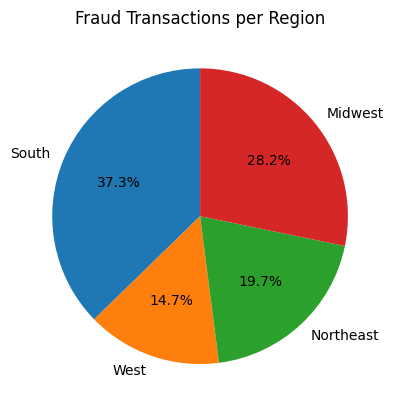

In [ ]:
plt.pie(regions['transaction'], labels=regions['region'], autopct='%1.1f%%', startangle=90)
plt.title('Fraud Transactions per Region')
plt.show()

###**3.2.3 City**

####**3.2.3.1 Menyederhanakan (binning) jumlah feature city menjadi lebih umum**

In [ ]:
city_counts = dft2['city'].value_counts()

bins = [0, 1000, 2000, 3000, 4000, 5000, city_counts.max() + 1]
labels = [1, 2, 3, 4, 5, 6]

city_to_range = pd.cut(city_counts, bins=bins, labels=labels, right=True)

dft2['city_range'] = dft2['city'].map(city_to_range).astype(int)

####**3.2.3.2 Visualisasi Transactions berdasarkan city**

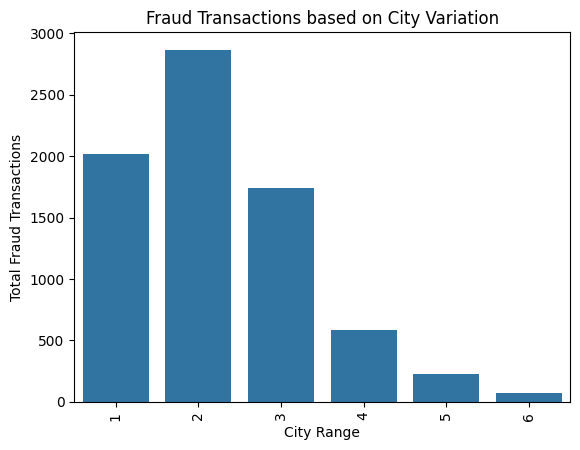

In [ ]:
fr = dft2[dft2['is_fraud'] == 1]
transaction_counts = fr['city_range'].value_counts().sort_index()

transaction_df = pd.DataFrame({
    'city_range': transaction_counts.index,
    'total_fraud_transactions': transaction_counts.values
})

sns.barplot(data=transaction_df, x='city_range', y='total_fraud_transactions')
plt.title("Fraud Transactions based on City Variation")
plt.ylabel("Total Fraud Transactions")
plt.xlabel("City Range")
plt.xticks(rotation=90)
plt.show()


In [ ]:
dft2.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,city_range
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,South,28654,...,-81.1781,3495,Psychologist,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,3


##**3.3 Handling Outlier**

###**3.3.1 Melihat jumlah outlier**

In [ ]:
numerical

['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

In [ ]:
for var in numerical:
  Q1 = dft2[var].quantile(0.25)
  Q3 = dft2[var].quantile(0.75)
  IQR = Q3 - Q1

  # Calculate the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count the number of outliers
  outliers = ((dft2[var] < lower_bound) | (dft2[var] > upper_bound)).sum()
  print(f"Number of outliers for {var}: {outliers} / {len(dft2[var])} = {(outliers / len(dft2[var]) * 100):.2f}%")

Number of outliers for amt: 67290 / 1296675 = 5.19%
Number of outliers for zip: 0 / 1296675 = 0.00%
Number of outliers for lat: 4679 / 1296675 = 0.36%
Number of outliers for long: 49922 / 1296675 = 3.85%
Number of outliers for city_pop: 242674 / 1296675 = 18.72%
Number of outliers for merch_lat: 4967 / 1296675 = 0.38%
Number of outliers for merch_long: 41994 / 1296675 = 3.24%


###**3.3.2 Trimming Outlier berdasarkan IQR**

In [ ]:
#Function untuk me-remove outlier untuk setiap feature
def remove_outliers(df, feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  print(f"{feature}, Q1:{Q1}, Q3:{Q3}, IQR: {IQR}")
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  print(f"{feature},  Lower bound: {lower_bound}, Upper bound: {upper_bound}")
  df_clean = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  return df_clean

data6_clean_1 = remove_outliers(data6, 'crim')
data6_clean_2 = remove_outliers(data6, 'zn')
data6_clean_3 = remove_outliers(data6, 'chas')
data6_clean_4 = remove_outliers(data6, 'nox')
data6_clean_5 = remove_outliers(data6, 'rm')
data6_clean_6 = remove_outliers(data6, 'age')
data6_clean_7 = remove_outliers(data6, 'dis')
data6_clean_8 = remove_outliers(data6, 'rad')
data6_clean_9 = remove_outliers(data6, 'tax')
data6_clean_10 = remove_outliers(data6, 'ptratio')
data6_clean_11 = remove_outliers(data6, 'black')
data6_clean_12 = remove_outliers(data6, 'lstat')
data6_clean_13 = remove_outliers(data6, 'medv')

data6_clean_array = [data6_clean_1, data6_clean_2, data6_clean_3, data6_clean_4, data6_clean_5, data6_clean_6, data6_clean_7, data6_clean_8, data6_clean_9, data6_clean_10, data6_clean_11, data6_clean_12, data6_clean_13]
data6_clean_trimming = data6_clean_1

#Menemukan intersection dari seluruh feature yang outliernya sudah di-remove
for df in [data6_clean_2, data6_clean_3, data6_clean_4, data6_clean_5, data6_clean_6, data6_clean_7, data6_clean_8, data6_clean_9, data6_clean_10, data6_clean_11, data6_clean_12, data6_clean_13]:
    data6_clean_trimming = pd.merge(data6_clean_trimming, df, how='inner')
    print("Shape:", data6_clean_trimming.shape)

data6_clean_trimming

##**3.4 Feature Engineering**

In [ ]:
dft3 = dft2.copy()

In [ ]:
dft3.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,city_range
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,South,28654,...,-81.1781,3495,Psychologist,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,3
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,West,99160,...,-118.2105,149,Teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,4


###**3.4.1 trans_hour, trans_day, trans_month, trans_year**

####**3.4.1.1 Addition**

In [ ]:
dft3['trans_date']=dft3.trans_date_trans_time.dt.date
dft3['trans_time']=dft3.trans_date_trans_time.dt.time
dft3.trans_date = pd.to_datetime(dft3['trans_date'],format='%Y-%m-%d')

In [ ]:
dft3['trans_year']=dft3.trans_date.dt.year
dft3['trans_month']=dft3.trans_date.dt.month
dft3['trans_hour']=dft3.trans_date_trans_time.dt.hour
dft3['trans_day']=dft3.trans_date.dt.day

dft3.head(2)

In [ ]:
#dft3['trans_year_month'] = dft3.trans_Date.dt.to_period('M')
#dft3['trans_weekday'] = dft3.trans_Date.dt.day_name()

####**3.4.1.2 Visualisasi**

#####**3.4.1.2.1 trans_hour**

#####**3.4.1.2.2 trans_day**

#####**3.4.1.2.3 trans_month**

#####**3.4.1.2.4 trans_year**

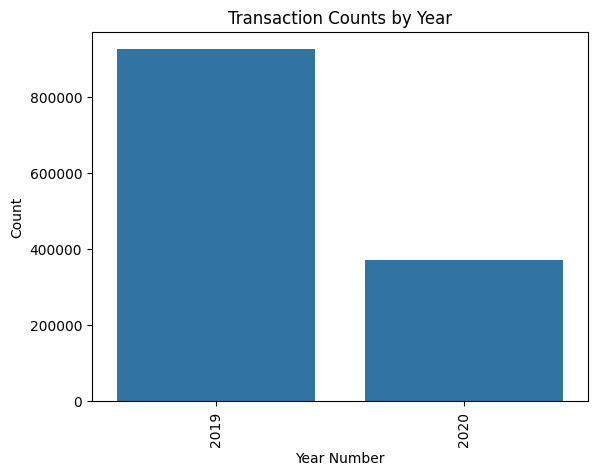

In [ ]:
sns.countplot(x='trans_year', data=dft3)
plt.title('Transaction Counts by Year')
plt.xlabel('Year Number')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###**3.4.2 age**

####**3.4.2.1 Addition**

In [ ]:
from datetime import datetime
dft3['age'] = dft3['trans_date_trans_time'].dt.year - dft3['dob'].dt.year
dft3['age'] -= ((dft3['trans_date_trans_time'].dt.month < dft3['dob'].dt.month) |
                 ((dft3['trans_date_trans_time'].dt.month == dft3['dob'].dt.month) &
                  (dft3['trans_date_trans_time'].dt.day < dft3['dob'].dt.day))).astype(int)

In [ ]:
#dft3["age"] = dft3["dob"].apply(lambda x : (datetime.now().year - x.year))

In [ ]:
dft3.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'city_range', 'trans_date', 'trans_time', 'trans_year',
       'trans_month', 'trans_hour', 'trans_day', 'age'],
      dtype='object')

####**3.4.2.2 Visualisasi**

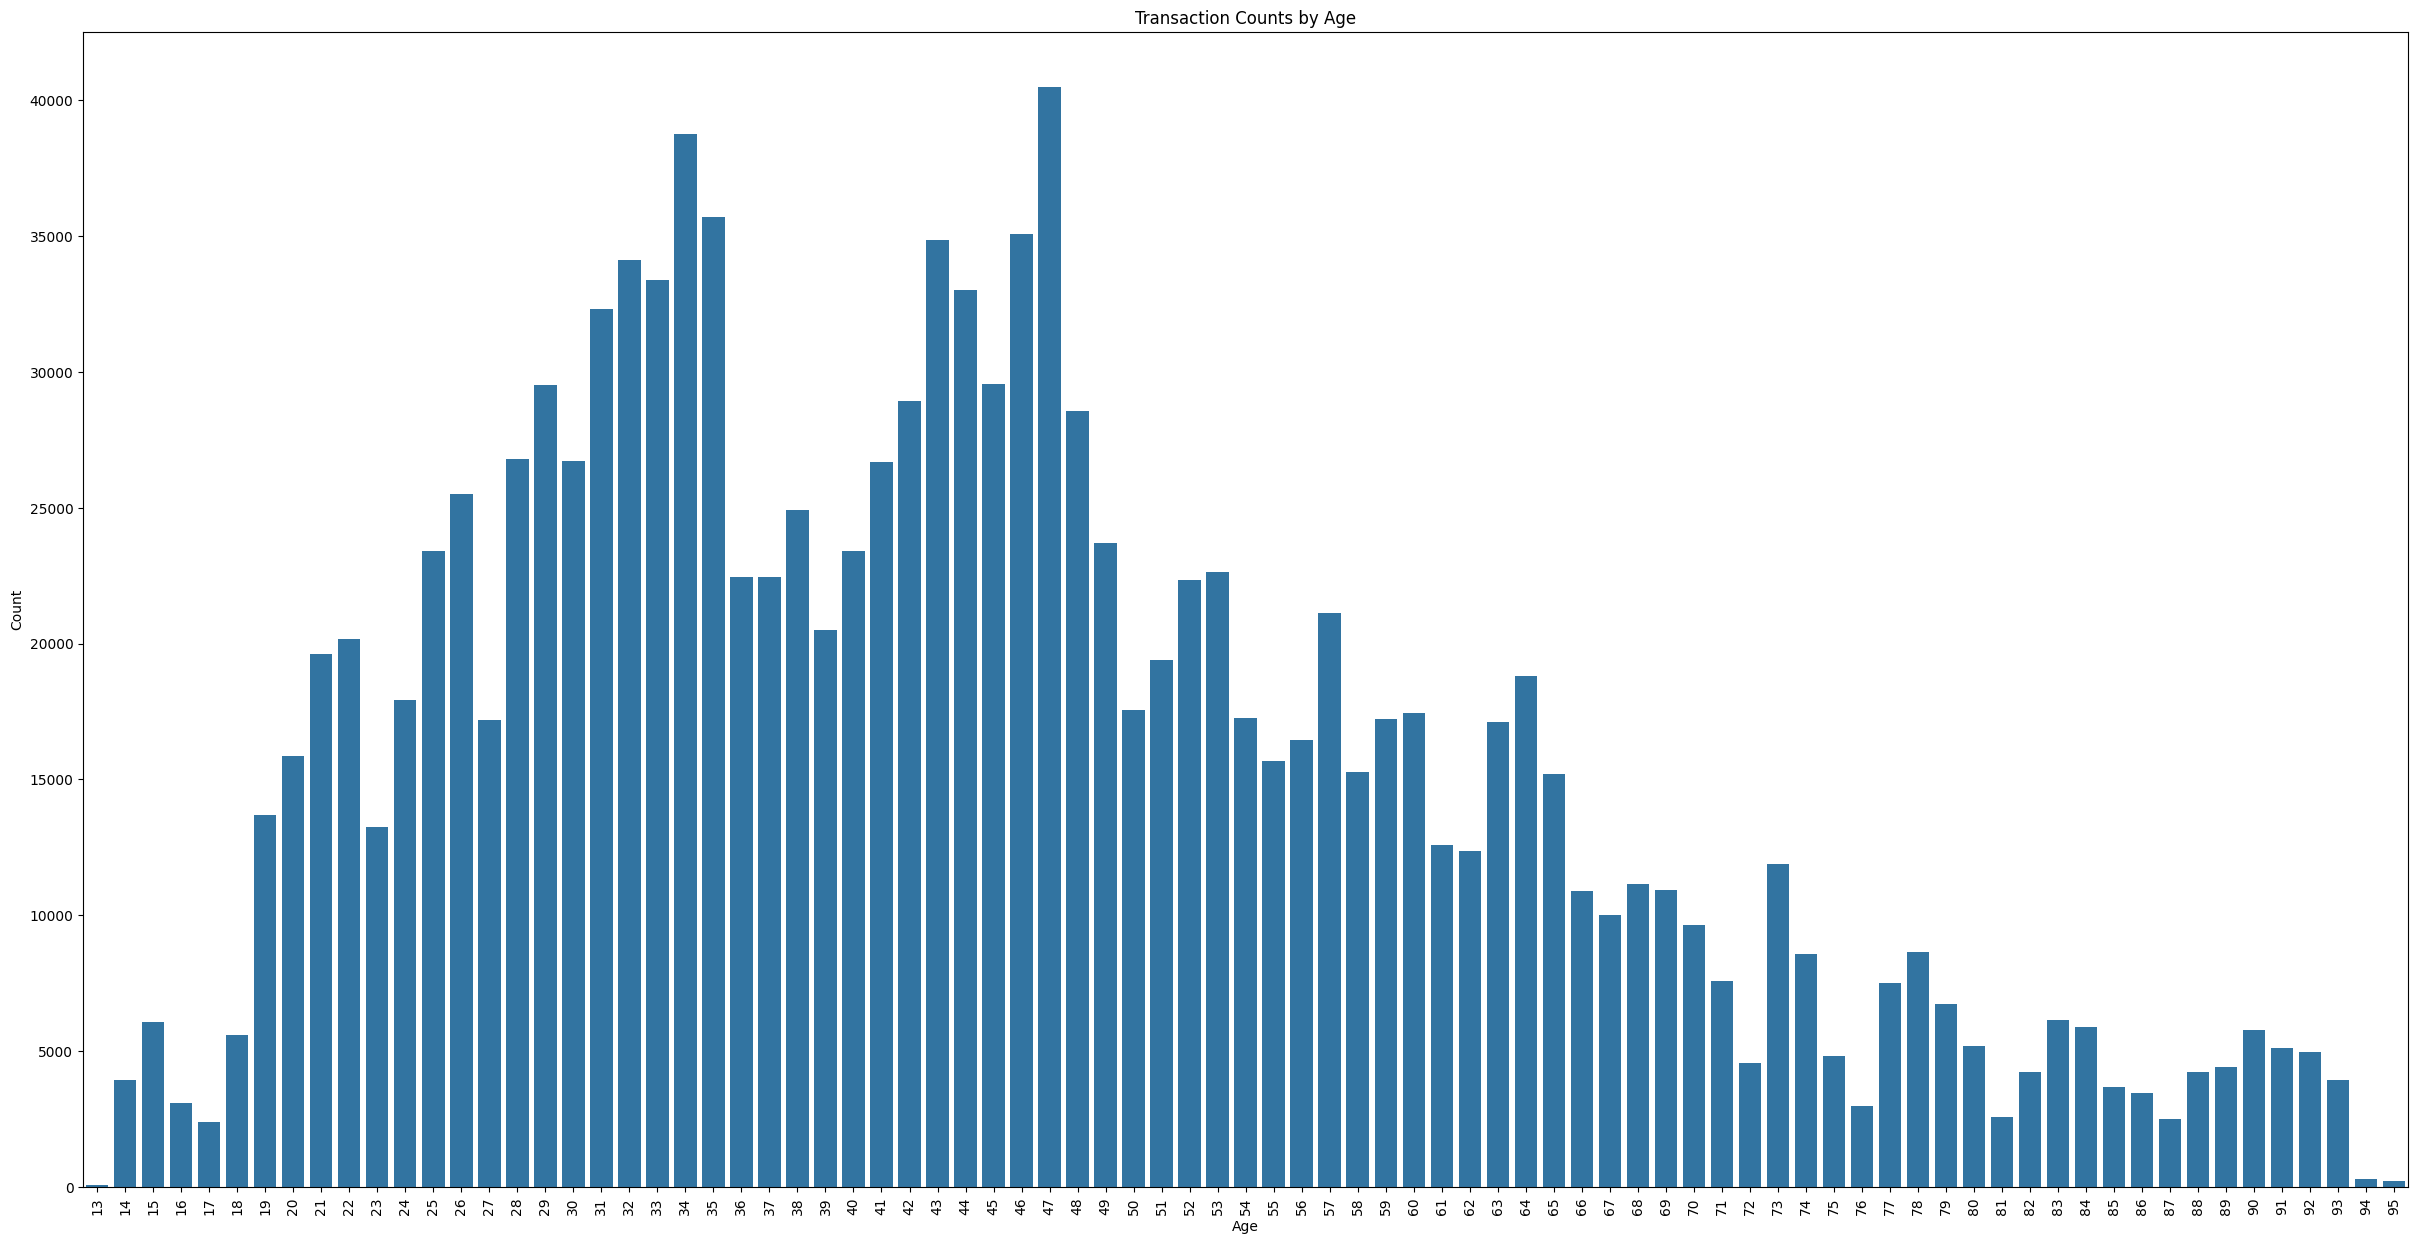

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x='age', data=dft3)
plt.title('Transaction Counts by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###**3.4.3 hist_trans_24h, hist_trans_30d, hist_amt_avg_24h, hist_amt_avg_30d**

In [ ]:
dft3.index = pd.to_datetime(dft3['trans_date_trans_time'])
dft3 = dft3.rename_axis(index={'trans_date_trans_time': 'time_index'})
dft3 = dft3.sort_index()
dft3['val_for_agg'] = 1

####**3.4.3.1 Addition**

#####**3.4.3.1.1 hist_trans_30d**

In [ ]:
df_hist_trans_30d = \
    dft3 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [ ]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()
df_hist_trans_30d.head(1)

,cc_num,trans_date_trans_time,hist_trans_30d
0,60416207185,2019-01-01 12:47:15,0.0


#####**3.4.3.1.2 hist_amt_avg_30d**

In [ ]:
df_hist_amt_avg_30d = \
    dft3 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_amt_avg_30d']

In [ ]:
df_hist_amt_avg_30d = df_hist_amt_avg_30d.groupby(
                                               ['cc_num','trans_date_trans_time'])['hist_amt_avg_30d'].min().reset_index()
df_hist_amt_avg_30d.head(1)

,cc_num,trans_date_trans_time,hist_amt_avg_30d
0,60416207185,2019-01-01 12:47:15,0.0


#####**3.4.3.1.3 hist_trans_24h**

In [ ]:
df_hist_trans_24h = \
    dft3 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

<ipython-input-128-6b73e97c5789>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .rolling('24H')\


In [ ]:
df_hist_trans_24h = df_hist_trans_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()
df_hist_trans_24h.head(1)

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0


#####**3.4.3.1.4 hist_amt_avg_24h**

In [ ]:
df_hist_amt_avg_24h = \
    dft3 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_amt_avg_24h']

In [ ]:
df_hist_amt_avg_24h = df_hist_amt_avg_24h.groupby(
    ['cc_num','trans_date_trans_time'])['hist_amt_avg_24h'].min().reset_index()
df_hist_amt_avg_24h.head(3)

,cc_num,trans_date_trans_time,hist_amt_avg_24h
0,60416207185,2019-01-01 12:47:15,0.000
1,60416207185,2019-01-02 08:44:57,7.270
2,60416207185,2019-01-02 08:47:36,30.105


####**3.4.3.2 Merging engineered feature to original data**

In [ ]:
dft3 = pd.merge(dft3, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
dft3 = pd.merge(dft3, df_hist_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
dft3 = pd.merge(dft3, df_hist_trans_24h, on=['cc_num', 'trans_date_trans_time'], how= 'left')
dft3 = pd.merge(dft3, df_hist_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how= 'left')

In [ ]:
dft3.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'city_range', 'trans_date', 'trans_time', 'trans_year',
       'trans_month', 'trans_hour', 'trans_day', 'age', 'val_for_agg',
       'hist_trans_30d', 'hist_amt_avg_30d', 'hist_trans_24h',
       'hist_amt_avg_24h'],
      dtype='object')

####**3.4.3.3 Visualisasi**

#####**3.4.3.2.1 hist_trans_30d**

In [ ]:
df_hist_trans_30d

,cc_num,trans_date_trans_time,hist_trans_30d
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0
...,...,...,...
1296650,4992346398065154184,2020-06-20 21:04:59,132.0
1296651,4992346398065154184,2020-06-21 00:41:01,131.0
1296652,4992346398065154184,2020-06-21 02:47:59,132.0
1296653,4992346398065154184,2020-06-21 08:04:28,133.0


#####**3.4.3.2.2 hist_amt_avg_30d**

In [ ]:
dft3.hist_amt_avg_30d.head(5)

,hist_amt_avg_30d
0,57.668036
1,46.643158
2,377.925000
3,60.806423
4,55.001736


#####**3.4.3.2.3 hist_trans_24h**

In [ ]:
transactions24_per_person = dft3.groupby([dft3['cc_num'], dft3['trans_date_trans_time'].dt.hour]).size().reset_index(name='hist_amt_avg_30d')
pivoted_data = transactions24_per_person.pivot(index='trans_date_trans_time', columns='cc_num', values='hist_amt_avg_30d').fillna(0)

pivoted_data.plot(figsize=(100, 60), legend=False)
plt.title("Average Amount Per Person Over the Last 30 Days")
plt.xlabel("Date")
plt.ylabel("Average Amount")
plt.show()

In [ ]:
dft3.hist_trans_24h.head(3)

,hist_trans_24h
0,5.0
1,2.0
2,5.0


#####**3.4.3.2.4 hist_amt_avg_24h**

In [ ]:
dft3.hist_amt_avg_24h.head(3)

,hist_amt_avg_24h
0,57.668036
1,46.643158
2,377.925000


###**3.4.4 distance_cust_store**

####**3.4.4.1 Addition**

In [ ]:
from math import radians, cos, sin, asin, sqrt

In [ ]:
def haversine_distance(lat, long, merch_lat, merch_long):

    # The math module contains a function named
    # radians which converts from degrees to radians.
    long = np.radians(long)
    merch_long = np.radians(merch_long)
    lat = np.radians(lat)
    merch_lat = np.radians(merch_lat)

    # Haversine formula
    dlon = merch_long - long
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    #c = 2 * np.arctan2(a**0.5, (1-a)**0.5)

    # Radius of earth in kilometers.
    r = 6371
    d=  c * r
    # calculate the result
    return round(d,2)

In [ ]:
dft3['distance_cust_store']= dft3[['lat', 'long', 'merch_lat', 'merch_long']].apply(
                                        lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

<ipython-input-146-709d9d0db9c4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)


####**3.4.4.2 Visualisasi**

##**3.5 Feature Reduction**

In [ ]:
dft3.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,trans_month,trans_hour,trans_day,age,val_for_agg,hist_trans_30d,hist_amt_avg_30d,hist_trans_24h,hist_amt_avg_24h,distance_cust_store
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,South,28654,...,1,0,1,30,1,56.0,57.668036,5.0,57.668036,78.60
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,West,99160,...,1,0,1,40,1,38.0,46.643158,2.0,46.643158,30.21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,West,83252,...,1,0,1,56,1,8.0,377.925000,5.0,377.925000,108.21


In [ ]:
dft3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

###**3.6.1 Feature Correlation**

In [ ]:
feature_corr = [x for x in dft3.columns if x not in ['trans_date_trans_time', 'unix_time', 'merchant', 'category', 'gender', 'street', 'city','state', 'dob', 'trans_num', 'trans_date', 'trans_time', 'state','job', 'val_for_agg']]
cor = dft3[feature_corr].corr()
cor

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,city_range,trans_year,trans_month,trans_hour,trans_day,age,hist_trans_30d,hist_amt_avg_30d,hist_trans_24h,hist_amt_avg_24h,distance_cust_store
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,-0.058942,-0.048252,-0.000981,-0.040944,0.000466,-0.000281,-0.000801,0.000545,-0.001225,-0.014898,0.007340,-0.011818,0.007340,0.003730
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,0.219404,-0.007163,0.000842,-0.001748,-0.022811,0.000629,-0.009755,-0.008341,0.087557,0.000954,0.087557,-0.001085
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,-0.113561,-0.908924,-0.002162,0.063290,0.000086,0.000852,0.005938,-0.000607,0.010699,0.024876,0.009914,0.015404,0.009914,0.006183
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.001894,-0.080708,0.001274,-0.001072,-0.011508,-0.000138,0.047891,-0.018868,-0.008642,-0.013231,-0.008642,-0.072634
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.015452,0.999120,0.001721,-0.040304,0.000191,-0.001213,-0.002290,0.000031,-0.029919,-0.012208,-0.001903,-0.007139,-0.001903,0.004058
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,0.002136,0.270952,-0.001673,0.000137,0.020381,0.000159,-0.092433,0.017871,0.032822,0.019231,0.032822,0.010901
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.001741,-0.080059,0.001244,-0.001116,-0.011378,-0.000276,0.047503,-0.018642,-0.008651,-0.013020,-0.008651,-0.072662
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.015431,1.000000,0.001721,-0.040323,0.000184,-0.001197,-0.002325,0.000076,-0.029843,-0.012223,-0.001917,-0.007153,-0.001917,0.004083
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,0.001741,0.001721,1.000000,-0.036631,0.003004,-0.012409,0.013799,0.003848,0.012248,-0.045942,0.184030,0.002817,0.184030,0.000403
city_range,-0.040944,-0.007163,0.063290,-0.080708,-0.040304,0.270952,-0.080059,-0.040323,-0.036631,1.000000,-0.002423,0.000433,0.075332,-0.001545,-0.234358,0.578622,-0.034974,0.373021,-0.034974,0.005751


###**3.6.2 Heatmap**

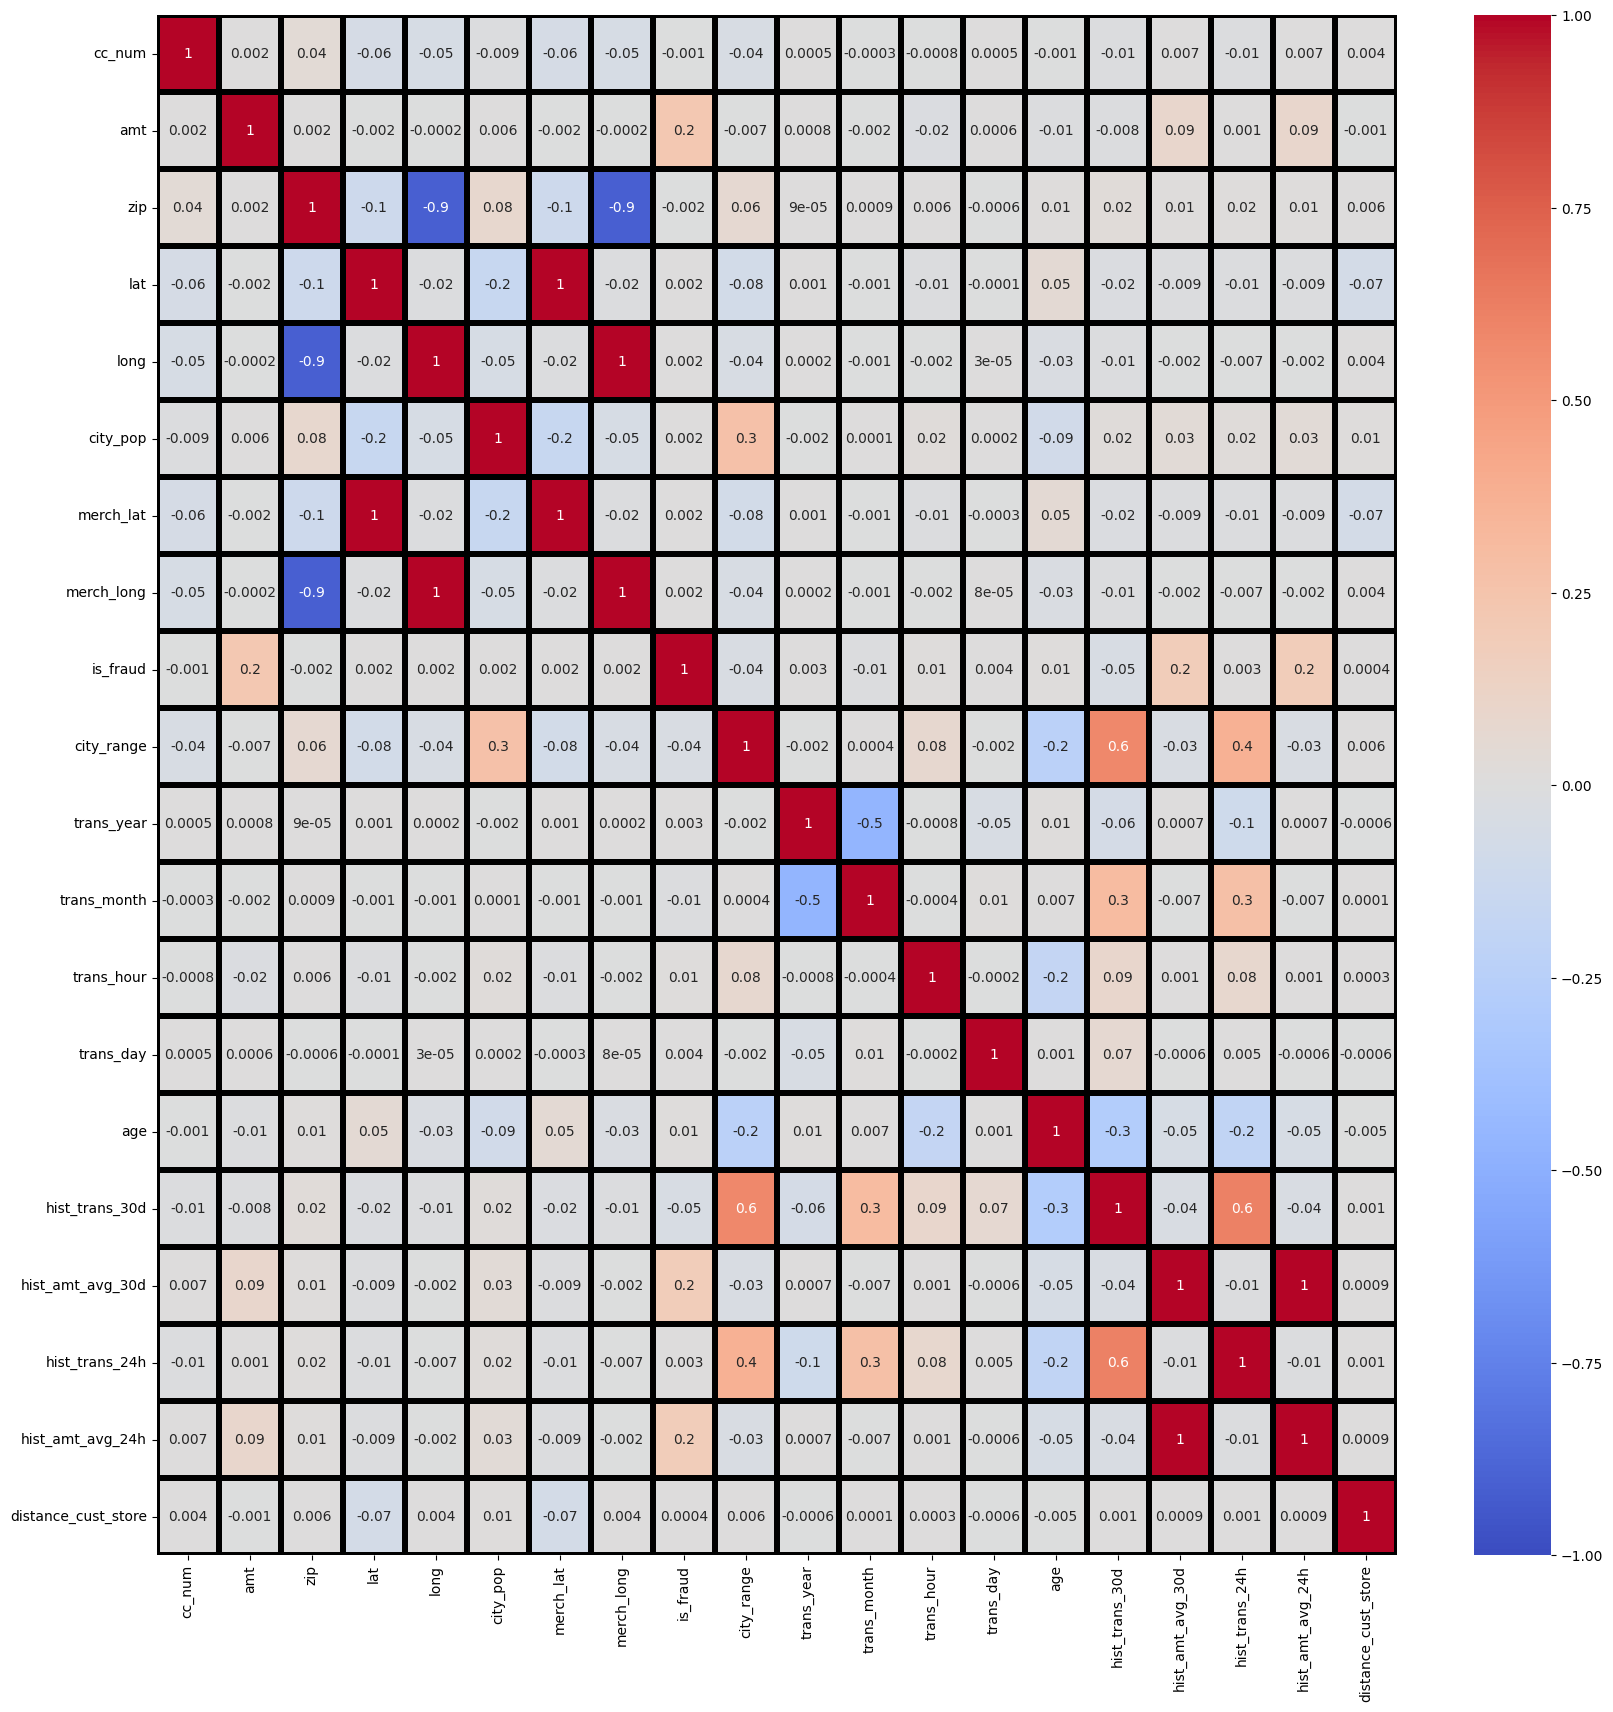

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dft3[feature_corr].corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black',cmap= 'coolwarm')
plt.show()

###**3.6.3 Drop Feature-Feature yang korelasinya tinggi (selain feature target)**

In [ ]:
dft4 = dft3.copy()

In [ ]:
dft4.drop(columns=['hist_amt_avg_30d','trans_year','unix_time','lat','long','zip'], axis=1, inplace=True)

In [ ]:
dft4.drop(columns=['trans_date_trans_time', 'cc_num','street','val_for_agg','dob','state','trans_date','trans_time','trans_num'],axis=1, inplace=True)

In [ ]:
dft4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   merchant             1296675 non-null  object 
 1   category             1296675 non-null  object 
 2   amt                  1296675 non-null  float64
 3   gender               1296675 non-null  object 
 4   city                 1296675 non-null  object 
 5   city_pop             1296675 non-null  int64  
 6   job                  1296675 non-null  object 
 7   merch_lat            1296675 non-null  float64
 8   merch_long           1296675 non-null  float64
 9   is_fraud             1296675 non-null  int64  
 10  city_range           1296675 non-null  int64  
 11  trans_month          1296675 non-null  int32  
 12  trans_hour           1296675 non-null  int32  
 13  trans_day            1296675 non-null  int32  
 14  age                  1296675 non-null  int64  
 15

In [ ]:
num_after_drop = ['amt','city_pop','city_range','merch_lat', 'merch_long','trans_month','trans_hour','trans_day','age','hist_trans_30d','hist_trans_24h','hist_amt_avg_24h','is_fraud','distance_cust_store']

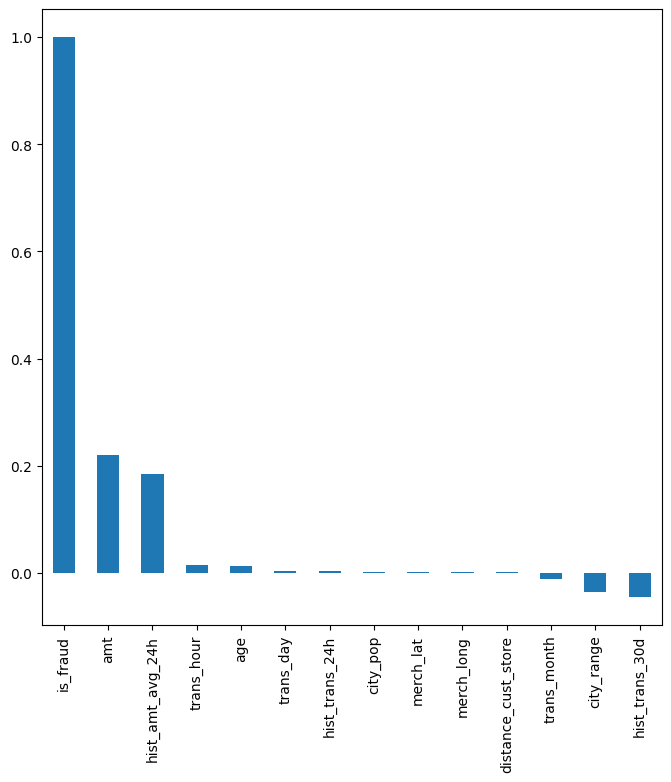

In [ ]:
plt.figure(figsize=(8,8))
dft4[num_after_drop].corr()['is_fraud'].sort_values(ascending = False).plot(kind='bar')
plt.show()

##**3.6 Feature Manipulation (Part 2)**

In [ ]:
dft4.head(2)

,merchant,category,amt,gender,city,city_pop,job,merch_lat,merch_long,is_fraud,city_range,trans_month,trans_hour,trans_day,age,hist_trans_30d,hist_trans_24h,hist_amt_avg_24h,distance_cust_store
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,3495,Psychologist,36.011293,-82.048315,0,3,1,0,1,30,56.0,5.0,57.668036,78.60
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,149,Teacher,49.159047,-118.186462,0,4,1,0,1,40,38.0,2.0,46.643158,30.21


###**3.6.1 Membuat dummy variable**

In [ ]:
gender_dummy = pd.get_dummies(dft4['gender'], prefix='gender').astype(int)
category_dummy = pd.get_dummies(dft4['category'],  prefix='category').astype(int)
job_dummy = pd.get_dummies(dft4['job'],  prefix='job').astype(int)
dft4 = pd.concat([dft4, gender_dummy, category_dummy,job_dummy], axis=1)

In [ ]:
dft4.drop(columns=['gender', 'category','job'],axis=1, inplace=True)

In [ ]:
dft4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 52 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   merchant                   1296675 non-null  object 
 1   amt                        1296675 non-null  float64
 2   city                       1296675 non-null  object 
 3   city_pop                   1296675 non-null  int64  
 4   merch_lat                  1296675 non-null  float64
 5   merch_long                 1296675 non-null  float64
 6   is_fraud                   1296675 non-null  int64  
 7   city_range                 1296675 non-null  int64  
 8   trans_month                1296675 non-null  int32  
 9   trans_hour                 1296675 non-null  int32  
 10  trans_day                  1296675 non-null  int32  
 11  age                        1296675 non-null  int64  
 12  hist_trans_30d             1296675 non-null  float64
 13  hist_trans_2

###**3.6.2 Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['merchant', 'city']

label_encoders = {}

# Apply Label Encoding for categorical features
for column in categorical_columns:
    le = LabelEncoder()
    dft4[column] = le.fit_transform(dft4[column].astype(str))
    label_encoders[column] = le

dft4.head()

,merchant,amt,city,city_pop,merch_lat,merch_long,is_fraud,city_range,trans_month,trans_hour,...,job_Manager,job_Officer,job_Other,job_Producer,job_Psychologist,job_Researcher,job_Scientist,job_Surveyor,job_Teacher,job_Technologist
0,514,4.97,526,3495,36.011293,-82.048315,0,3,1,0,...,0,0,0,0,1,0,0,0,0,0
1,241,107.23,612,149,49.159047,-118.186462,0,4,1,0,...,0,0,0,0,0,0,0,0,1,0
2,390,220.11,468,4154,43.150704,-112.154481,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,360,45.00,84,1939,47.034331,-112.561071,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,297,41.96,216,99,38.674999,-78.632459,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


#**4. DATA MODELING**

In [ ]:
target = ['is_fraud']
feature = [var for var in dft4.columns if var != target]

X = dft4[feature]
y= dft4[target]

In [ ]:
X.head(3)

,merchant,amt,city,city_pop,merch_lat,merch_long,is_fraud,city_range,trans_month,trans_hour,...,job_Manager,job_Officer,job_Other,job_Producer,job_Psychologist,job_Researcher,job_Scientist,job_Surveyor,job_Teacher,job_Technologist
0,514,4.97,526,3495,36.011293,-82.048315,0,3,1,0,...,0,0,0,0,1,0,0,0,0,0
1,241,107.23,612,149,49.159047,-118.186462,0,4,1,0,...,0,0,0,0,0,0,0,0,1,0
2,390,220.11,468,4154,43.150704,-112.154481,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y.head(3)

,is_fraud
0,0
1,0
2,0


##**4.1 Split Training-Validation-Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=dft4['is_fraud'], random_state=42, test_size=0.3)

Beberapa algoritma untuk keperluan classification yang bisa dipilih:

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

##**4.2 Class Imbalance Handling (sementara belum)**

##**4.3 Adaboost Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

###**4.3.1 Modeling**

In [ ]:
abc_log = AdaBoostClassifier(estimator=LogisticRegression())

In [ ]:
abc_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

AdaBoostClassifier(estimator=LogisticRegression())

In [ ]:
y_pred_log = abc_log.predict(X_test)

###**4.3.2 Evaluation**

In [ ]:
from sklearn.metrics import classification_report
report_log = classification_report(y_test, y_pred_log)
print(report_log)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.06      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.53      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



##**4.4 Adaboost Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

###**4.4.1 Modeling**

In [ ]:
abc_ran = AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [ ]:
abc_ran.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [ ]:
y_pred_ran = abc_ran.predict(X_test)

###**4.4.2 Evaluation**

In [ ]:
from sklearn.metrics import classification_report
report_ran = classification_report(y_test, y_pred_ran)
print(report_ran)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       1.00      1.00      1.00      2252

    accuracy                           1.00    389003
   macro avg       1.00      1.00      1.00    389003
weighted avg       1.00      1.00      1.00    389003



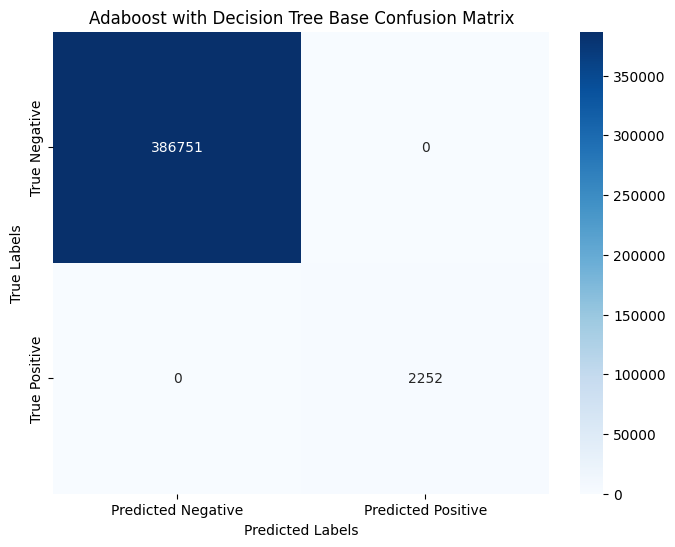

In [ ]:
cm_ada_rf = confusion_matrix(y_test, y_pred_ran)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Adaboost with Decision Tree Base Confusion Matrix')
plt.show()

##**4.5 Logistic Regression**

###**4.5.1 Modeling**

In [ ]:
log_reg_model = LogisticRegression(random_state=42, max_iter=200)
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###**4.5.2 Evaluation**

In [ ]:
report_log_reg = classification_report(y_test, log_reg_predictions)
print(report_log_reg)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.43      0.09      0.15      2252

    accuracy                           0.99    389003
   macro avg       0.71      0.55      0.57    389003
weighted avg       0.99      0.99      0.99    389003



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

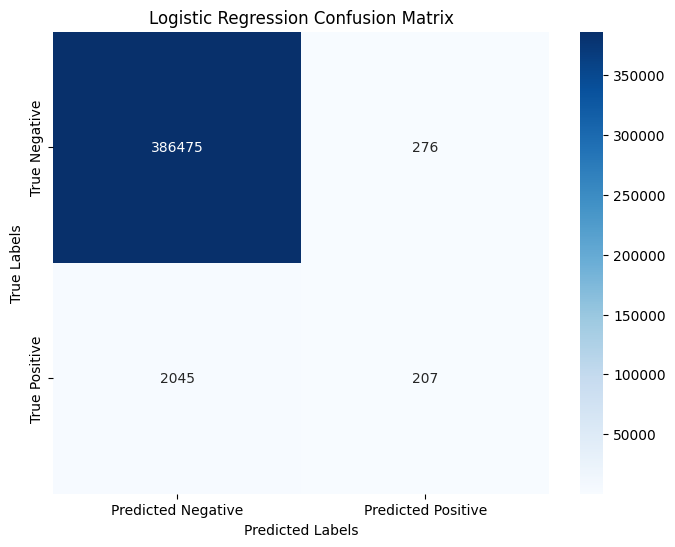

In [ ]:
cm_log_reg = confusion_matrix(y_test, log_reg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

##**4.6 Random Forest**

###**4.6.1 Modeling**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


###**4.6.2 Evaluation**

In [ ]:
report_dec_tree = classification_report(y_test, rf_predictions)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       1.00      1.00      1.00      2252

    accuracy                           1.00    389003
   macro avg       1.00      1.00      1.00    389003
weighted avg       1.00      1.00      1.00    389003



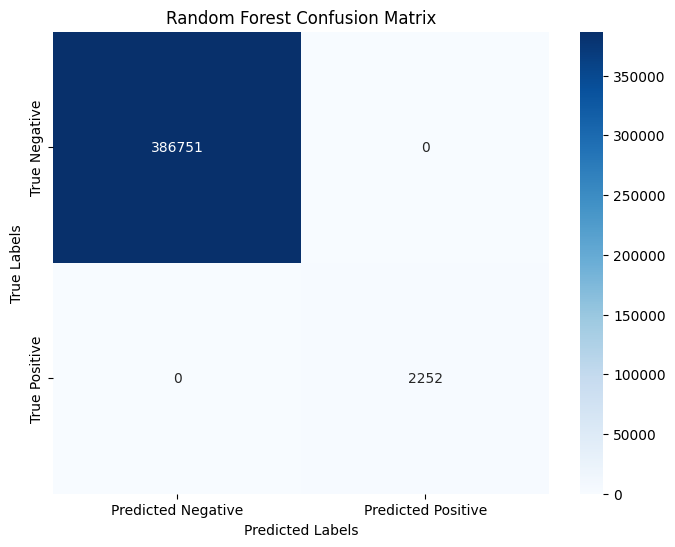

In [ ]:
cm_ran_for = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ran_for, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

-----------------------------------------------------------------------------------------------------------ALGO LAINNYA--------------------------------------------------------------------------------------------------

**SVM Classifier**

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
report_svm = classification_report(y_test, svm_predictions)
print(report_svm)

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')
plt.show()

**KNN Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
report_knn = classification_report(y_test, knn_pred)
print(report_knn)

In [ ]:
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()